    Employee_ID  Age  Years_At_Company  Salary  Performance_Score Department  \
0             1   50                14   79243                 94      Sales   
1             2   36                 9   59046                 81         HR   
2             3   29                 7   49486                 84    Finance   
3             4   42                12   68338                 76    Finance   
4             5   40                 9   63911                 68         HR   
..          ...  ...               ...     ...                ...        ...   
95           96   58                20   90757                 94      Sales   
96           97   56                20   94434                100         HR   
97           98   43                12   61060                 96  Marketing   
98           99   48                16   88711                 90    Finance   
99          100   56                20   83420                100      Sales   

    Bonus  
0    7448  
1    4782  
2  

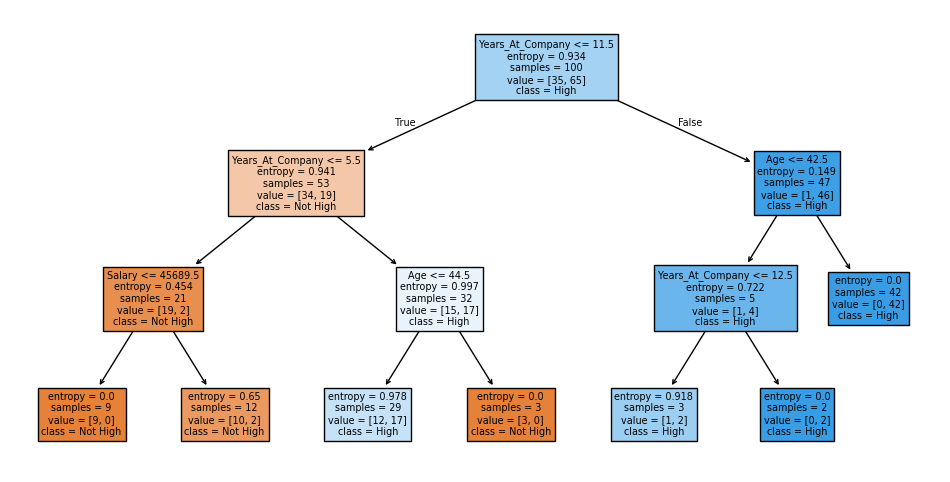

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('realistic_employee_data.csv')

X = df[['Age', 'Years_At_Company', 'Salary']]  
y = (df['Performance_Score'] >= 80).astype(int)  # 1 = High Performer, 0 = Not

print(df)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
tree.fit(X, y)


plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()

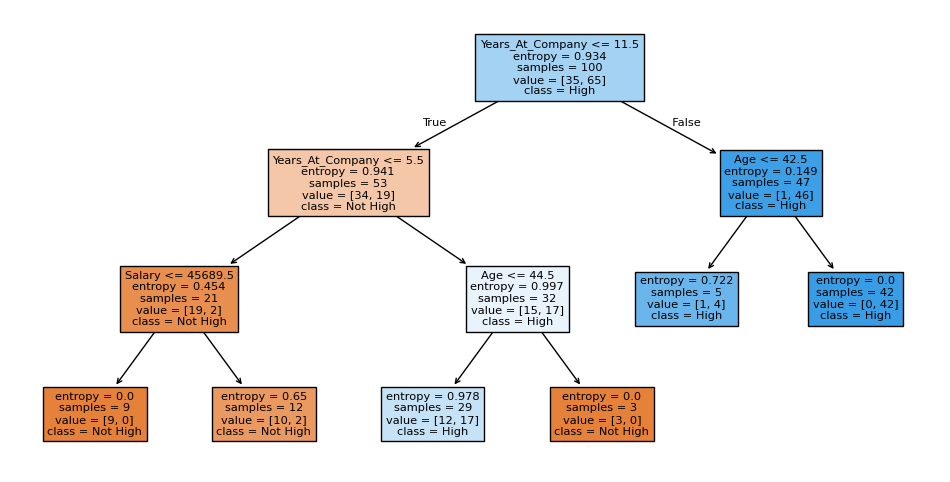

In [2]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,           # limit depth
    min_samples_split=5,   # require at least 5 samples to split
    min_samples_leaf=3,    # at least 3 per leaf
    random_state=42
)
tree.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()


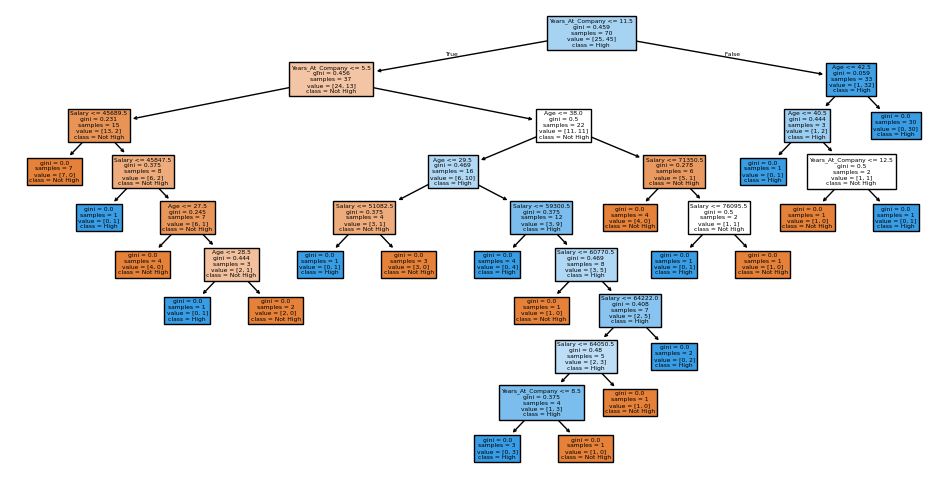

Train Accuracy: 1.0
Test Accuracy: 0.8666666666666667


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features & target
X = df[['Age', 'Years_At_Company', 'Salary']]
y = (df['Performance_Score'] >= 80).astype(int)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Deep tree (overfit risk)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
deep_tree.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(deep_tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()

print("Train Accuracy:", accuracy_score(y_train, deep_tree.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, deep_tree.predict(X_test)))


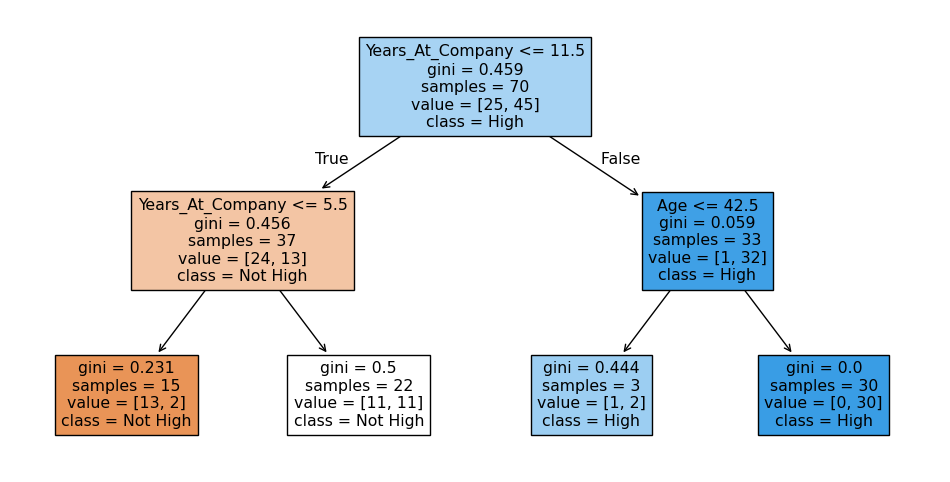

Train Accuracy: 0.8
Test Accuracy: 0.8


In [7]:
# Shallow tree (underfit risk)
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(shallow_tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()

print("Train Accuracy:", accuracy_score(y_train, shallow_tree.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, shallow_tree.predict(X_test)))


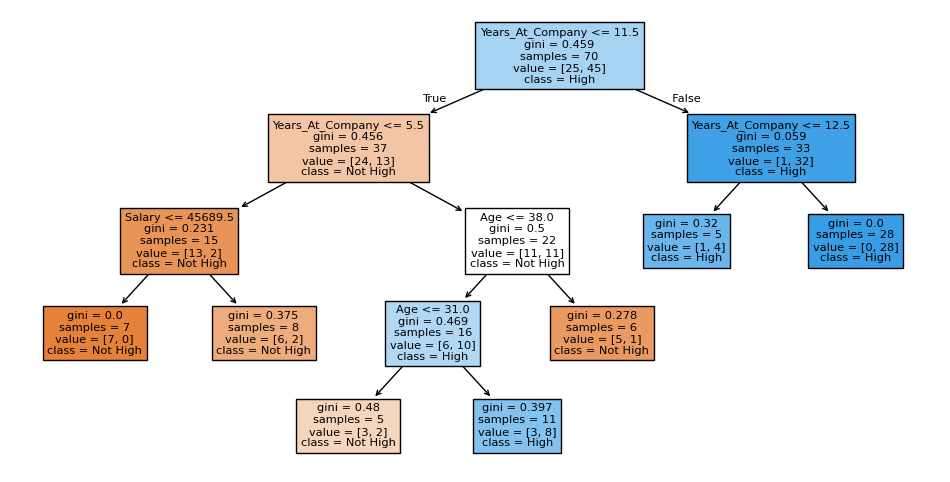

Train Accuracy: 0.8714285714285714
Test Accuracy: 0.8


In [8]:
# Balanced tree (tuned)
balanced_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)
balanced_tree.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(balanced_tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()

print("Train Accuracy:", accuracy_score(y_train, balanced_tree.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, balanced_tree.predict(X_test)))


In [9]:
import pandas as pd

# After training your tree:
importances = tree.feature_importances_
feat_importance = pd.Series(importances, index=X.columns)
print(feat_importance.sort_values(ascending=False))


Years_At_Company    0.838971
Age                 0.128808
Salary              0.032221
dtype: float64


In [22]:
# Train a Decision Tree normally.

# Print feature importance → see which features matter most.

# Train another tree with class_weight="balanced" → compare.

# Train a pruned tree with ccp_alpha=0.01 → compare.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('realistic_employee_data.csv')

df["High_Performer"] = (df["Performance_Score"]>=85).astype(int)


print(df)
X = df[["Years_At_Company","Age","Salary"]]
y = df["High_Performer"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)


tree = DecisionTreeClassifier(max_depth=4,random_state=42)
tree.fit(X_train,y_train)

print("Normal tree accuracy:",accuracy_score(y_test,tree.predict(X_test)))

    Employee_ID  Age  Years_At_Company  Salary  Performance_Score Department  \
0             1   50                14   79243                 94      Sales   
1             2   36                 9   59046                 81         HR   
2             3   29                 7   49486                 84    Finance   
3             4   42                12   68338                 76    Finance   
4             5   40                 9   63911                 68         HR   
..          ...  ...               ...     ...                ...        ...   
95           96   58                20   90757                 94      Sales   
96           97   56                20   94434                100         HR   
97           98   43                12   61060                 96  Marketing   
98           99   48                16   88711                 90    Finance   
99          100   56                20   83420                100      Sales   

    Bonus  High_Performer  
0    7448  

In [23]:
importances = pd.Series(tree.feature_importances_,index=X.columns)
print(f"feature importance \n {importances.sort_values(ascending=False)}")

feature importance 
 Years_At_Company    0.836381
Salary              0.115530
Age                 0.048089
dtype: float64


In [25]:
bal_tree = DecisionTreeClassifier(random_state=42,max_depth=4,class_weight='balanced')
print(bal_tree)
bal_tree.fit(X_train,y_train)
print("balanced",accuracy_score(y_test,bal_tree.predict(X_test)))

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)
balanced 0.8


In [26]:
pruned_tree = DecisionTreeClassifier(random_state=42,ccp_alpha=0.01)
pruned_tree.fit(X_train,y_train)
print(f"pruned tree {accuracy_score(y_test,pruned_tree.predict(X_test))}")

pruned tree 0.8


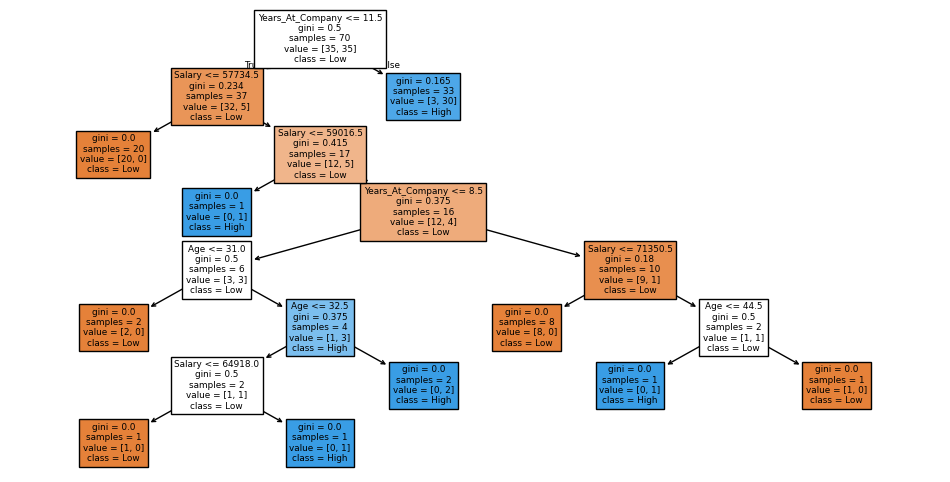

In [28]:
plt.figure(figsize=(12,6))
plot_tree(pruned_tree,feature_names=X.columns,class_names=["Low","High"],filled=True)
plt.show()

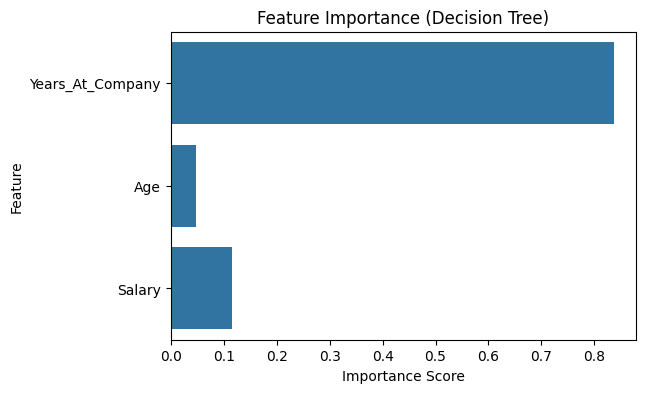

In [32]:
import seaborn as sns

# Feature importance from the trained tree
importances = pd.Series(bal_tree.feature_importances_, index=X.columns)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


the accuracy of random forest is 0.8333333333333334
the classification report is 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

The cofusion matrix is 
[[13  3]
 [ 2 12]]


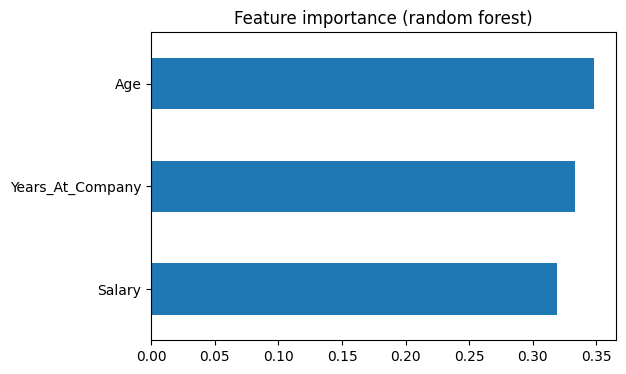

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rft = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rft.fit(X_train,y_train)

y_pred_rft = rft.predict(X_test)

accu_rft = accuracy_score(y_test,y_pred_rft)

print(f"the accuracy of random forest is {accu_rft}")

reprt = classification_report(y_test,y_pred_rft)

print(f"the classification report is \n {reprt}")

conf_rft = confusion_matrix(y_test,y_pred_rft)

print(f"The cofusion matrix is \n{conf_rft}")

importances = pd.Series(rft.feature_importances_,index= X.columns)
importances.sort_values().plot(kind="barh",figsize=(6,4))

plt.title("Feature importance (random forest)")
plt.show()


In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import pandas as pd


In [4]:
df = pd.read_csv("realistic_employee_data.csv")

df["High_Performer"] = (df["Performance_Score"]>= 85).astype(int)

X = df[["Years_At_Company", "Age", "Salary"]]
y = df["High_Performer"]

print(df)


    Employee_ID  Age  Years_At_Company  ...  Department  Bonus High_Performer
0             1   50                14  ...       Sales   7448              1
1             2   36                 9  ...          HR   4782              0
2             3   29                 7  ...     Finance   4156              0
3             4   42                12  ...     Finance   5193              0
4             5   40                 9  ...          HR   4345              0
..          ...  ...               ...  ...         ...    ...            ...
95           96   58                20  ...       Sales   8531              1
96           97   56                20  ...          HR   9443              1
97           98   43                12  ...   Marketing   5861              1
98           99   48                16  ...     Finance   7983              1
99          100   56                20  ...       Sales   8342              1

[100 rows x 8 columns]


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3 ,  random_state= 42)


In [6]:
base_tree = DecisionTreeClassifier(max_depth=1)

ada = AdaBoostClassifier(estimator=base_tree , n_estimators= 50, learning_rate= 1.0, random_state=42)
ada.fit(X_train,y_train)

c:\Users\user105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [9]:
y_pred = ada.predict(X_test)

print("accuracy_score" , accuracy_score(y_test,y_pred))
print("confusion_matrix", confusion_matrix(y_test,y_pred))
print("classification report \n", classification_report(y_test,y_pred))

accuracy_score 0.7666666666666667
confusion_matrix [[13  3]
 [ 4 10]]
classification report 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.77      0.71      0.74        14

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



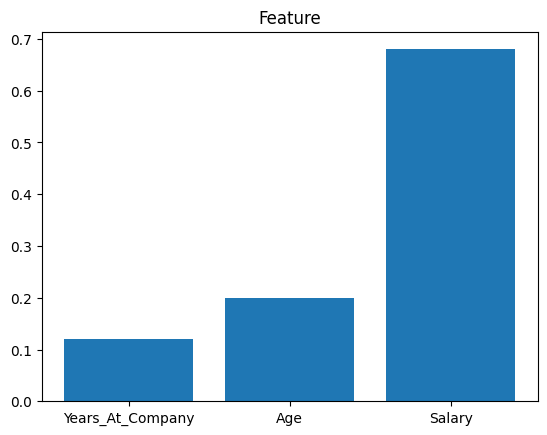

In [10]:
import matplotlib.pyplot as plt
importances = ada.feature_importances_

plt.bar(X.columns,importances)
plt.title("Feature")
plt.show()